# **Tugas Besar 2 ML**
---
### Anggota
1. M. Khairul Makirin - 13517088 (K-Means Clustering dan Visualisasi)
2. Ihsan Imaduddin azhar - 13517043 (Agglomerative Clustering)
3. Muhammad Fariz Lutfan Wakan - 13517034 (Evaluasi K-Means Clustering)
4. Avisenna Abimanyu - 13517010 (Evaluasi Aglomerative clustering)

## **Bagian A**

### **Prepare Iris Dataset**

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
iris_data = iris_dataset.data
column_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

### **K-Means Algorithm**

Implementasi algoritma K-Means clustering dilakukan dengan cara membuat sebuah kelas KMeansClassifier dengan fungsi **train()**, dimana dalam fungsi train kita akan menjalankan algoritma K-Mean Clustrering dengan langkah sebagai berikut,
1. Ambil K centroid awal secara random dari data
2. Assign tiap titik ke centroid terdekatnya dengan sebuah fungsi jarak
3. Hitung centroid baru dengan mengambil rata2 dari setiap titik yang terhubung ke centroid tertentu
4. Ulangi langkah 2 sampai convergen (centroid tidak berubah lagi atau iterasi telah melewati suatu batas)

In [0]:
from math import inf
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
import matplotlib.pyplot as plt
import operator


class KMeansClassifier:
  def __init__(self, k, data, distFunc, eps, maxIteration):
    self.k = k
    self.datas = data
    self.distFunc = distFunc
    self.epsilon = eps
    self.maxIteration = maxIteration
    self.centroids = []
    self.dataAssignments = [0] * len(data)

  def train(self):
    currEps = inf
    currIter = 0

    ## pick k random centroids as starting centroids
    self.centroids = np.array([random.choice(self.datas) for i in range(self.k)])

    ## stopping condition is epsilon and max iteration
    while (currEps > self.epsilon and currIter <= self.maxIteration):
      ## iterate new
      currIter += 1

      ## assign every point to the nearest centroid based on distance function
      for i, data in enumerate(self.datas):
        centroidIdx = np.argmin([self.distFunc(data, self.centroids[j]) for j in range(self.k)])
        self.dataAssignments[i] = centroidIdx

      self.dataAssignments = np.array(self.dataAssignments)

      ## calculate new centroid
      newCentroids = np.zeros_like(self.centroids)
      countItem = [0]*self.k

      for dataIdx, centroidIdx in enumerate(self.dataAssignments):
        newCentroids[centroidIdx] += self.datas[dataIdx]
        countItem[centroidIdx] += 1

      newCentroids = np.array([mSum/countItem[i] for i, mSum in enumerate(newCentroids)])

      ## calculate new epsilon
      currEps = max([self.distFunc(newCentroids[i], self.centroids[i]) for i in range(self.k)])
      print("Iteration = {0}\tEpsilon = {1}".format(currIter, currEps))

      if currEps < self.epsilon:
        break

      self.centroids = newCentroids
    
    ## rapihin assignment kelasnya
    ## cari kelas paling maksimal
    sumDict = dict()
    transform = dict()
    currClass = iris_dataset.target[0]

    for i, target in enumerate(iris_dataset.target):
      if target == currClass:
        if self.dataAssignments[i] not in sumDict.keys():
          sumDict[self.dataAssignments[i]] = 1
        else :
          sumDict[self.dataAssignments[i]] += 1
      else :
        maxClass = max(sumDict.items(), key=operator.itemgetter(1))[0]
        if maxClass not in transform.keys():
          transform[maxClass] = currClass

        sumDict = dict()
        currClass = target
        
    maxClass = max(sumDict.items(), key=operator.itemgetter(1))[0]
    if maxClass not in transform.keys():
      transform[maxClass] = currClass

    sumDict = dict()
    currClass = target

    for i in range(len(self.dataAssignments)):
      self.dataAssignments[i] = transform[self.dataAssignments[i]]
  
  def visualize(self):
    figDatas = plt.figure()
    figCentroid = plt.figure()

    ax = figDatas.add_subplot(111, projection='3d')
    bx = figCentroid.add_subplot(111, projection='3d')
    
    ax.set_xlabel(column_names[0])
    ax.set_ylabel(column_names[1])
    ax.set_zlabel(column_names[2])

    bx.set_xlabel(column_names[0])
    bx.set_ylabel(column_names[1])
    bx.set_zlabel(column_names[2])

    imgDatas = ax.scatter([el[0] for el in self.datas], [el[2] for el in self.datas], [el[2] for el in self.datas], c=[el[3] for el in self.datas], cmap="viridis")
    imgCentroid = bx.scatter([el[0] for el in self.centroids], [el[2] for el in self.centroids], [el[2] for el in self.centroids], c=[el[3] for el in self.centroids], cmap="viridis")

    figDatas.colorbar(imgDatas, label=column_names[3])
    figCentroid.colorbar(imgCentroid, label=column_names[3])

    plt.show()

### **Testing**

Iteration = 1	Epsilon = 2.2002736104571836
Iteration = 2	Epsilon = 1.0659944031268418
Iteration = 3	Epsilon = 0.2915292619426624
Iteration = 4	Epsilon = 0.04521885731895446
Iteration = 5	Epsilon = 0.0
Centroids :
 [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]]
Predicted Class :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
Actual Class :
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 

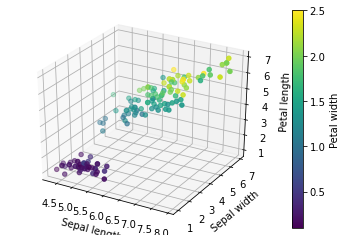

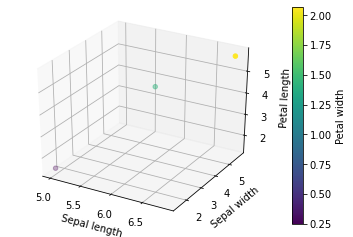

In [19]:
def euclidean(point1, point2):
  point1 = np.array(point1)
  point2 = np.array(point2)

  return np.linalg.norm(point1-point2)

## random.seed(13517088)

mKMeansClassifier = KMeansClassifier(3, iris_data, euclidean, 0.001, 100)
mKMeansClassifier.train()
print("Centroids :\n", mKMeansClassifier.centroids)
print("Predicted Class :\n", mKMeansClassifier.dataAssignments)
print("Actual Class :\n", iris_dataset.target)
##print(mKMeansClassifier.datas)

mKMeansClassifier.visualize()

### **Evaluasi Folwkes-Mallows & Sillhouette**

Nilai FMI : 0.8208080729114153
Nilai SI : 0.5528190123564091


<Figure size 432x288 with 0 Axes>

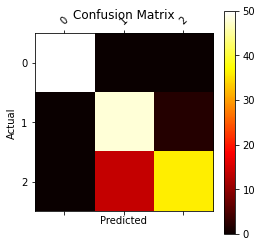

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fowlkes_mallows_score, silhouette_score

def confusionMatrix(y_actu, y_pred):
  cm = confusion_matrix(y_actu, y_pred)

  plt.matshow(cm, cmap=plt.hot()) # imshow
  plt.colorbar()

  tick_marks = np.arange(len([1, 2, 3]))
  plt.xticks(tick_marks, [0, 1, 2], rotation=45)
  plt.yticks(tick_marks, [0, 1, 2])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")

  plt.plot()

  return cm

cm = confusionMatrix(iris_dataset.target, mKMeansClassifier.dataAssignments)

fowlkesMallows = fowlkes_mallows_score(iris_dataset.target, mKMeansClassifier.dataAssignments)
silhouette = silhouette_score(iris_data, mKMeansClassifier.dataAssignments)

print("Nilai FMI :", fowlkesMallows)
print("Nilai SI :", silhouette)

## **Bagian B**

### **Agglomerative Algorithm**

Implementasi algoritma agglomerative clustering dilakukan dengan membuat objek agglomerative terlebih dahulu. Dimana konstruktor menerima dataset yang ingin di klustering.Lalu dengan fungsi generate_cluster(), akan dibuat cluster dari dataset, mulai dari cluster kecil berukuran satu hingga satu kluster sebesar dataset. Dengan fungsi fet_cluster yang menerima parameter jumlah cluster, pengguna dapat mengakses cluster dengan jumlah cluster yang diinginkan.

Algoritma agglomerative dilakukan sebagai berikut,

1. algoritma membuat cluster kecil dimana setiap cluster hanya memiliki satu anggota
2. Hitung jarak dari setiap cluter yang terbentuk
3. Gabungkan kedua cluster yang memiliki jarak paling dekat
4. Jika sudah menjadi satu cluster, berhenti. Jika belum, kembali ke langkah 2


In [0]:
from __future__ import division

from sklearn import datasets
import pandas as pd
from scipy.spatial import distance
import copy

def listToCluster(lst):
        op = { i : [i] for i in range(0, len(lst) ) }
        return op

def zero_matriks_maker(n):
    listofzeros = [0] * n
    return [listofzeros.copy() for j in range(n)]

def less_than(a,b):
    return a < b

def more_than(a,b):
    return a > b

def mean(a):
    return sum(a) / len(a)

class Agglomerative:
    
    def __init__(self,dataset,linkage_type):
        self.dataset = dataset
        self.cluster = listToCluster(dataset)
        self.linkage_type = linkage_type
        self.cluster_distance = self.calculate_cluster_distance()
        print(self.cluster_distance)
        self.generated_cluster = {}
        self.generated_cluster[len(self.cluster)] = copy.deepcopy(self.cluster)
           

    def process_data(self):
        self.cluster = listToCluster(dataset)
        self.cluster_distance = self.calculate_cluster_distance()
        self.generated_cluster = {}
        self.generated_cluster[len(self.cluster)] = copy.deepcopy(self.cluster)
        

    def join_cluster(self,a,b):
        if(a<b):
            self.cluster[a].extend(self.cluster[b])
            self.cluster.pop(b)
        else:
            self.cluster[b].extend(self.cluster[a])
            self.cluster.pop(a)

    def calculate_cluster_distance(self):
        if(self.linkage_type == "single-link"):
            return self.single_distance()
        elif(self.linkage_type == "complete-link"):
            return self.complete_distance()
        elif(self.linkage_type == "average-link"):
            return self.average_distance()
        else:
            return self.average_group_distance()

    def single_distance(self):
        distances = {}
        for i in self.cluster:
            inner_value = {}
            for j in self.cluster:
                if( j > i):
                    current_value = 999999 # min
                    for p1 in self.cluster[i]:
                        for p2 in self.cluster[j]:
                            point_distance = self.calculate_point_distance(self.dataset[p1],self.dataset[p2])
                            if(point_distance < current_value):
                                current_value = point_distance

                    distances[(i,j)] = current_value
        return distances

    def complete_distance(self):
        distances = {}
        for i in self.cluster:
            inner_value = {}
            for j in self.cluster:
                if( j > i):
                    current_value = 0 # max
                    for p1 in self.cluster[i]:
                        for p2 in self.cluster[j]:
                            point_distance = self.calculate_point_distance(self.dataset[p1],self.dataset[p2])
                            if(point_distance > current_value):
                                current_value = point_distance

                    distances[(i,j)] = current_value
        return distances

    def average_distance(self):
        distances = {}
        for i in self.cluster:
            inner_value = {}
            for j in self.cluster:
                if( j > i):
                    point_distances = []
                    for p1 in self.cluster[i]:
                        for p2 in self.cluster[j]:
                            point_distances.append(self.calculate_point_distance(self.dataset[p1],self.dataset[p2]))

                    distances[(i,j)] = mean(point_distances)
        return distances

    def average_group_distance(self):
        distances = {}
        for i in self.cluster:
            inner_value = {}
            for j in self.cluster:
                if( j > i):
                    cluster1 = []
                    cluster2 = []
                    for p1 in self.cluster[i]:
                        cluster1.append(self.dataset[p1].copy())
                    for p2 in self.cluster[j]:
                        cluster2.append(self.dataset[p2].copy())

                    dist = self.calculate_point_distance(map(mean, zip(*cluster1)),map(mean, zip(*cluster2)))
                    distances[(i,j)] = dist
        return distances


    def calculate_point_distance(self, p1, p2):
        return distance.euclidean(tuple(p1), tuple(p2))

    def get_minimum_distance_index(self):
        idx = -1
        idy = -1
        value = 9999
        for i in self.cluster_distance:
            if(self.cluster_distance[i] < value):
                value = self.cluster_distance[i]
                idx , idy = i
                #idy = j

        return (value, idx, idy)

    
    def generate_cluster(self):
        for i in range(len(self.dataset)-1):
            self.cluster_distance = self.calculate_cluster_distance()
            min_value , idx, idy = self.get_minimum_distance_index()
            self.join_cluster(idx,idy)
            self.generated_cluster[len(self.cluster)] = copy.deepcopy(self.cluster)
        print(self.cluster_distance)

        

    def get_clusters(self,i):
        return self.generated_cluster[i]

### **Testing**

In [22]:
iris = datasets.load_iris()

dataset = iris.data
# print(dataset)
# dummy data
test_data = [[0,1],[0,2],[1,2],[5,6],[10,11],[12,12],[10,11],[100,1],[99,3],[1,150]]
# print(test_data)

temp = Agglomerative(dataset, "average-group-link")
# temp = Agglomerative(test_data, "average-link")
# temp = Agglomerative(test_data, "single-link")
# temp = Agglomerative(test_data, "complete-link")
temp.generate_cluster()

for i in temp.generated_cluster:
    print(i,temp.get_clusters(i))



{(0, 1): 0.5385164807134502, (0, 2): 0.509901951359278, (0, 3): 0.648074069840786, (0, 4): 0.1414213562373093, (0, 5): 0.616441400296898, (0, 6): 0.5196152422706632, (0, 7): 0.17320508075688762, (0, 8): 0.9219544457292882, (0, 9): 0.4690415759823426, (0, 10): 0.37416573867739483, (0, 11): 0.3741657386773941, (0, 12): 0.5916079783099615, (0, 13): 0.9949874371066197, (0, 14): 0.8831760866327848, (0, 15): 1.1045361017187267, (0, 16): 0.5477225575051664, (0, 17): 0.09999999999999998, (0, 18): 0.7416198487095667, (0, 19): 0.33166247903553986, (0, 20): 0.4358898943540679, (0, 21): 0.30000000000000016, (0, 22): 0.648074069840786, (0, 23): 0.46904157598234303, (0, 24): 0.5916079783099615, (0, 25): 0.5477225575051661, (0, 26): 0.31622776601683794, (0, 27): 0.14142135623730995, (0, 28): 0.14142135623730995, (0, 29): 0.5385164807134499, (0, 30): 0.5385164807134503, (0, 31): 0.3872983346207423, (0, 32): 0.6244997998398396, (0, 33): 0.8062257748298552, (0, 34): 0.4582575694955836, (0, 35): 0.374165


### **Evaluasi Folwkes-Mallows & Sillhouette**

FM Index : 0.8407289157574822
Silhouette Value : 0.4041298098574426
[array([5.006, 3.428, 1.462, 0.246]), array([5.9296875, 2.7578125, 4.4109375, 1.4390625]), array([6.85277778, 3.075     , 5.78611111, 2.09722222])]


<Figure size 432x288 with 0 Axes>

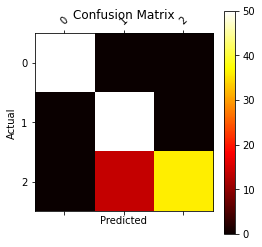

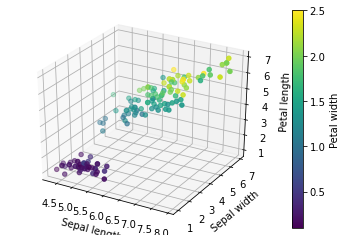

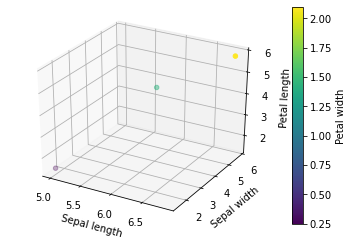

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score

def confusionMatrix(y_actu, y_pred):
  cm = confusion_matrix(y_actu, y_pred)

  plt.matshow(cm, cmap=plt.hot()) # imshow
  plt.colorbar()

  tick_marks = np.arange(len([1, 2, 3]))
  plt.xticks(tick_marks, [0, 1, 2], rotation=45)
  plt.yticks(tick_marks, [0, 1, 2])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")

  plt.plot()

  return cm

target = iris_dataset.target
predictionResult = []
k=0

# index generated_cluster menunjukkan list cluster yang digunakan sesuai tahap proses agglomerativenya
for i in temp.generated_cluster[3]:
  lent = len(temp.generated_cluster[3][i])
  for j in range(lent):
    predictionResult.append(k)
  k+=1

cm = confusionMatrix(target, predictionResult)

## calculate folwkes-mallows index
target = iris_dataset.target
foelkesMallows = fowlkes_mallows_score(target, predictionResult)
silhouette = silhouette_score(iris_data, predictionResult)

print("FM Index :", foelkesMallows)
print("Silhouette Value :", silhouette)

## calculate centroids for generated clusters
centroids = [[]] * 3

for i, key in enumerate(temp.generated_cluster[3].keys()):
  cluster_idx = temp.generated_cluster[3][key]
  sum = 0
  n = 0

  for idx in cluster_idx:
    sum += iris_data[idx]
    n += 1
  
  sum /= n
  centroids[i] = sum

print(centroids)

## visualisasi cluster
figDatas = plt.figure()
figCentroid = plt.figure()

ax = figDatas.add_subplot(111, projection='3d')
bx = figCentroid.add_subplot(111, projection='3d')

ax.set_xlabel(column_names[0])
ax.set_ylabel(column_names[1])
ax.set_zlabel(column_names[2])

bx.set_xlabel(column_names[0])
bx.set_ylabel(column_names[1])
bx.set_zlabel(column_names[2])

imgDatas = ax.scatter([el[0] for el in iris_data], [el[2] for el in iris_data], [el[2] for el in iris_data], c=[el[3] for el in iris_data], cmap="viridis")
imgCentroid = bx.scatter([el[0] for el in centroids], [el[2] for el in centroids], [el[2] for el in centroids], c=[el[3] for el in centroids], cmap="viridis")

figDatas.colorbar(imgDatas, label=column_names[3])
figCentroid.colorbar(imgCentroid, label=column_names[3])

plt.show()




## **Evaluasi Perbandingan**
Dapat dilihat dari hasil indeks Folwkes-Mallows dan nilai Silhouette antara clustering menggunakan aglomeratif dan k-means yaitu, algoritma aglomeratif lebih bagus dalam membedakan kluster, hal ini dapat dikarenakan algoritma aglomerative tidak sensitif terhadap kluster awal yang terbentuk ,lain halnya dengan k-means clustering